In [1]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("EXAMPLE_GNN.csv")

node_names = df.iloc[:, 0].astype(str).tolist()
feat_df = df.iloc[:, 1:]

feat_df = feat_df.select_dtypes(include=["number"]).fillna(0.0)
assert len(node_names) == len(feat_df)
assert feat_df.shape[1] > 0

x = torch.as_tensor(feat_df.to_numpy(dtype="float32"))

edge_index = torch.empty((2, 0), dtype=torch.long)

data = Data(x=x, edge_index=edge_index)
data.node_names = node_names
data.num_nodes = x.shape[0]

nodes_table = pd.DataFrame({"node": node_names})
nodes_table = pd.concat([nodes_table, feat_df.reset_index(drop=True)], axis=1)
print(nodes_table.to_string(index=False))

 node  feature_chem_seq  sample_num_occur_1  sample_num_occur_2  feature_3
node1          0.446807            1.709380            0.691575  -0.004359
node2         -1.018638           -0.157258           -0.360668  -1.530005
node3          0.963623           -1.219883           -1.353300  -1.388402


In [1]:
class SimpleGCN(torch.nn.Module):
    def __init__(self, in_dim, hidden_dim=16, out_dim=8):
        super().__init__()
        self.conv1 = GCNConv(in_dim, hidden_dim, add_self_loops=True, normalize=True)
        self.conv2 = GCNConv(hidden_dim, out_dim, add_self_loops=True, normalize=True)
    def forward(self, data: Data):
        x = self.conv1(data.x, data.edge_index)
        x = F.relu(x)
        x = self.conv2(x, data.edge_index)
        return x  

model = SimpleGCN(in_dim=data.x.size(1), hidden_dim=16, out_dim=8)
model.eval()
with torch.no_grad():
    embeddings = model(data)

print("Embeddings shape:", tuple(embeddings.shape))

NameError: name 'torch' is not defined

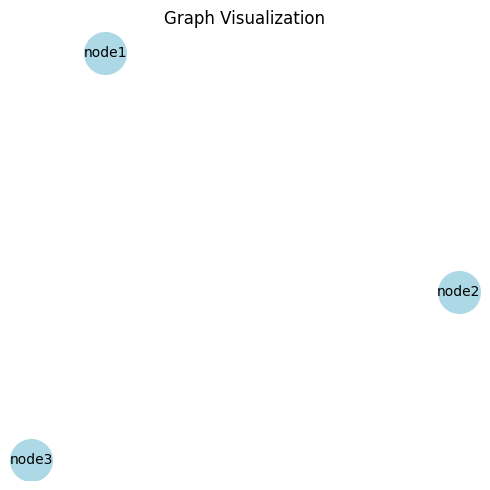

In [13]:
G = nx.Graph()
G.add_nodes_from(range(len(node_names)))
labels = {i: node_names[i] for i in range(len(node_names))}
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, node_size=900, edgecolors="lightblue", node_color = "lightblue")
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
plt.title("Graph Visualization")
plt.axis("off")
plt.tight_layout()
plt.show()